# Logistic Regression: Multi-Class Classification

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Load and prepare the IRIS sample dataset

We use the Iris Flower (dt. "Schwertlilie") dataset to demonstrate how logistic regression works.

The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


In [60]:
iris_db = load_iris(as_frame=True)

In [61]:
y = iris_db.target.values

### Visualization of the output space: Softmax classification

In [104]:
# We use a two features ("petal width" and "petal length") for classification
x = iris_db.data[["petal length (cm)", "petal width (cm)"]].values

In [110]:
# Train the logistic regression model
# c => Softmax regression
# C: Inverse of regularization strength. A SMALLER values specify STRONGER regularization.
model = LogisticRegression(multi_class='multinomial', random_state=42, C=30)
model.fit(x, y)

LogisticRegression(C=30, multi_class='multinomial', random_state=42)

In [114]:
# Sample some test features (petal length, petal width) in a regular interval
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
x_test = np.c_[x0.ravel(), x1.ravel()]

# Predict the probability that each sample belongs to the negative and positive class
y_test_proba = model.predict_proba(x_test)

# Predict the class label
y_test_class = model.predict(x_test)

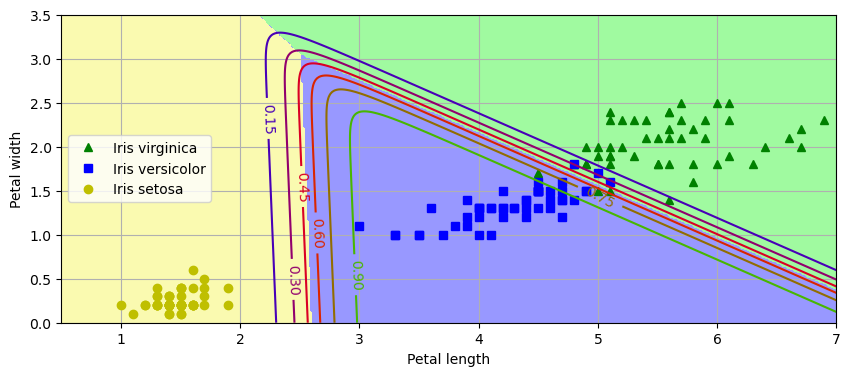

In [115]:
plt.figure(figsize=(10, 4))

# Plot samples of each class
plt.plot(x[y == 2, 0], x[y == 2, 1], "g^", label="Iris virginica")
plt.plot(x[y == 1, 0], x[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(x[y == 0, 0], x[y == 0, 1], "yo", label="Iris setosa")

# Show contour lines that the probability
contour = plt.contour(x0, x1, y_test_proba[:, 1].reshape(x0.shape), cmap=plt.cm.brg)
plt.contourf(x0, x1, y_test_class.reshape(x0.shape), cmap=ListedColormap(["#fafab0", "#9898ff", "#a0faa0"]))
plt.clabel(contour, inline=1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.legend(loc="center left")

plt.show()

### Visualization of the output space: One-vs-All classification

In [116]:
# We use a two features ("petal width" and "petal length") for classification
x = iris_db.data[["petal length (cm)", "petal width (cm)"]].values

In [117]:
# Train the logistic regression model
# One-vs-all => OVR (One-vs-Rest)
model = LogisticRegression(multi_class='ovr', random_state=42, C=30)
model.fit(x, y)

LogisticRegression(C=30, multi_class='ovr', random_state=42)

In [118]:
# Sample some test features (petal length, petal width) in a regular interval
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
x_test = np.c_[x0.ravel(), x1.ravel()]

# Predict the probability that each sample belongs to the negative and positive class
y_test_proba = model.predict_proba(x_test)

# Predict the class label
y_test_class = model.predict(x_test)

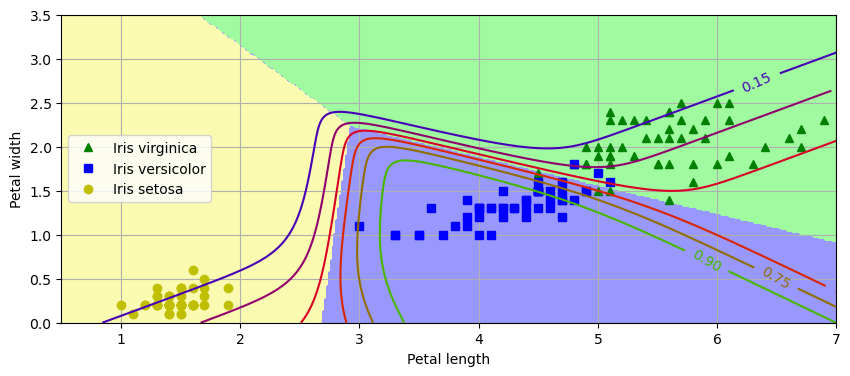

In [119]:
plt.figure(figsize=(10, 4))

# Plot samples of each class
plt.plot(x[y == 2, 0], x[y == 2, 1], "g^", label="Iris virginica")
plt.plot(x[y == 1, 0], x[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(x[y == 0, 0], x[y == 0, 1], "yo", label="Iris setosa")

# Show contour lines that the probability
contour = plt.contour(x0, x1, y_test_proba[:, 1].reshape(x0.shape), cmap=plt.cm.brg)
plt.contourf(x0, x1, y_test_class.reshape(x0.shape), cmap=ListedColormap(["#fafab0", "#9898ff", "#a0faa0"]))
plt.clabel(contour, inline=1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.legend(loc="center left")

plt.show()